In [1]:
# Install required libraries
!pip install yfinance timesfm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of googleapis-common-protos to determine which version is compatible with other requirements. This could take a while.
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.2/440.2 kB 33.7 MB/s eta

In [1]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=b0d27d4436130fca33859d02526b2fca62218644d3e5be476f27c4a7d7e4c58e
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [2]:
import os
import time
import timesfm
from collections import defaultdict
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


2024-09-21 06:32:25.091213: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
# Load TimesFM model
timesfm_backend = "gpu"  # or 'cpu'
from jax._src import config
config.update("jax_platforms", {"cpu": "cpu", "gpu": "cuda", "tpu": ""}[timesfm_backend])

In [8]:
import pandas as pd
import ta
from sklearn.preprocessing import MinMaxScaler

start_date = "2022-10-12"
end_date = "2024-01-01"
analysis_start_date = "2023-01-01"  # تاریخ شروع مورد نظر

# دانلود داده‌های سهام از فایل
df = pd.read_csv('/content/خودرو.csv')

# Ensure the 'date' column is parsed as datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filter the DataFrame by the date range
data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
data.dropna(inplace=True)
# Set 'date' column as index and ensure it's datetime
data.set_index('date', inplace=True)

# محاسبه میانگین‌های متحرک و اندیکاتورهای تکنیکال
data['moving_avg_10'] = data['close'].rolling(window=10).mean()
data['moving_avg_50'] = data['close'].rolling(window=50).mean()
data['rsi'] = ta.momentum.RSIIndicator(data['close'], window=14).rsi()
data['ema'] = ta.trend.EMAIndicator(data['close'], window=10).ema_indicator()



# فیلتر کردن داده‌ها از تاریخ شروع مورد نظر
analysis_start_date = pd.to_datetime(analysis_start_date)  # Convert to datetime
data = data[data.index >= analysis_start_date]

# حذف سطرهایی که دارای مقادیر NaN هستند (به دلیل محاسبات میانگین‌های متحرک)
data.dropna(inplace=True)
# تنظیم DataFrame نهایی
df_final = data[['close', 'volume', 'moving_avg_10', 'moving_avg_50', 'rsi', 'ema']].reset_index()
df_final.columns = ['date', 'close', 'volume', 'moving_avg_10', 'moving_avg_50', 'rsi', 'ema']
df_final['date'] = pd.to_datetime(df_final['date'])
df_final.set_index('date', inplace=True)

# نمایش داده‌ها
df=df_final
df

/tmp/ipykernel_1191/1471406813.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
/tmp/ipykernel_1191/1471406813.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['moving_avg_10'] = data['close'].rolling(window=10).mean()
/tmp/ipykernel_1191/1471406813.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

,close,volume,moving_avg_10,moving_avg_50,rsi,ema
date,,,,,,
2023-01-01,2950.0,1345500753,2681.5,2332.68,75.355262,2735.346508
2023-01-02,3080.0,579189542,2731.1,2356.42,78.950429,2798.010779
2023-01-03,3170.0,2127828444,2798.7,2382.48,81.015254,2865.645183
2023-01-04,3330.0,1022535786,2878.5,2412.36,84.016923,2950.073332
2023-01-07,3412.0,1250800861,2970.6,2444.80,85.299731,3034.059999
...,...,...,...,...,...,...
2023-12-26,2718.0,168546657,2777.6,2630.86,48.497521,2767.600447
2023-12-27,2732.0,166270066,2772.4,2632.50,50.106167,2761.127638
2023-12-30,2736.0,232527644,2770.3,2635.10,50.581110,2756.558977


In [9]:


def get_batched_data_fn(batch_size: int = 32, context_len: int = 32, horizon_len: int = 1):
    examples = defaultdict(list)
    num_examples = 0
    for start in range(0, len(df) - (context_len + horizon_len), horizon_len):
        num_examples += 1
        context_end = start + context_len
        examples["inputs"].append(df["close"][start:context_end].tolist())
        examples["volume"].append(df["volume"][start:context_end].tolist() + [df["volume"].iloc[context_end - 1]])
        examples["moving_avg_10"].append(df["moving_avg_10"][start:context_end].tolist() + [df["moving_avg_10"].iloc[context_end - 1]])
        examples["moving_avg_50"].append(df["moving_avg_50"][start:context_end].tolist() + [df["moving_avg_50"].iloc[context_end - 1]])
        examples["rsi"].append(df["rsi"][start:context_end].tolist() + [df["rsi"].iloc[context_end - 1]])
        examples["ema"].append(df["ema"][start:context_end].tolist() + [df["ema"].iloc[context_end - 1]])
        examples["outputs"].append(df["close"][context_end:context_end + horizon_len].tolist())
        examples["dates"].append(df.index[start:context_end + horizon_len].tolist())  # Add dates to examples

    def data_fn():
        for i in range(1 + (num_examples - 1) // batch_size):
            yield {k: v[(i * batch_size): ((i + 1) * batch_size)] for k, v in examples.items()}

    return data_fn

In [11]:
import timesfm

context_len = 64
batch_size = 1  # ثابت نگه‌داشتن batch size
horizon_len = 1  # ثابت نگه‌داشتن horizon length



In [12]:

    model = timesfm.TimesFm(
        context_len=context_len,
        horizon_len=horizon_len,
        input_patch_len=32,
        output_patch_len=128,
        num_layers=20,
        model_dims=1280,
        backend="gpu",
    )
    model.load_from_checkpoint(repo_id="google/timesfm-1.0-200m")

2024-09-21 06:37:57.221518: W external/xla/xla/service/gpu/nvptx_compiler.cc:718] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.6.68). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/5.73k [00:00<?, ?B/s]

(…)nts/checkpoint_1100000/metadata/metadata:   0%|          | 0.00/43.9k [00:00<?, ?B/s]

(…)oint_1100000/descriptor/descriptor.pbtxt:   0%|          | 0.00/499 [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

checkpoint:   0%|          | 0.00/814M [00:00<?, ?B/s]

Constructing model weights.


Constructed model weights in 4.58 seconds.
Restoring checkpoint from /root/.cache/huggingface/hub/models--google--timesfm-1.0-200m/snapshots/8775f7531211ac864b739fe776b0b255c277e2be/checkpoints.


ERROR:absl:For checkpoint version > 1.0, we require users to provide
          `train_state_unpadded_shape_dtype_struct` during checkpoint
          saving/restoring, to avoid potential silent bugs when loading
          checkpoints to incompatible unpadded shapes of TrainState.


Restored checkpoint in 1.42 seconds.
Jitting decoding.
Jitted decoding in 23.41 seconds.


In [14]:
import os
import time
from collections import defaultdict
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import timesfm
import ta
from itertools import combinations
import gc
import json



features = ["volume", "moving_avg_10", "moving_avg_50", "rsi", "ema"]
feature_combinations = []
for r in range(1, len(features) + 1):
    feature_combinations.extend(combinations(features, r))
results_by_cov = []

from sklearn.preprocessing import MinMaxScaler

# Iterate over feature combinations
for combo in feature_combinations:
    print(f"Processing combo: {combo}")
    input_data = get_batched_data_fn(batch_size=batch_size, context_len=context_len, horizon_len=1)
    metrics = defaultdict(list)

    # Process in smaller sub-batches
    for i, example in enumerate(input_data()):
        scalers = {}  # Dictionary to store scalers for each feature

        # Initialize empty dict to hold normalized data for covariates
        normalized_covariates = {}

        # Normalize each feature separately
        for feature in combo:
            scaler = MinMaxScaler()

            scalers[feature] = scaler  # Store the scaler for denormalization later
            normalized_covariates[feature] = [scaler.fit_transform(np.array(example[feature]).reshape(-1, 1)).flatten()]

        # Normalize 'inputs' (closing prices or other main feature)
        scaler_inputs = MinMaxScaler()
        scalers['inputs'] = scaler_inputs  # Store scaler for 'inputs'
        normalized_inputs = [scaler_inputs.fit_transform(np.array(example["inputs"]).reshape(-1, 1)).flatten()]


        # Model predictions using normalized data
        raw_forecast, _ = model.forecast(
            inputs=normalized_inputs, freq=[0] * len(normalized_inputs)
        )

        cov_forecast, ols_forecast = model.forecast_with_covariates(
            inputs=normalized_inputs,
            dynamic_numerical_covariates={feature: normalized_covariates[feature] for feature in combo},
            dynamic_categorical_covariates={},
            static_numerical_covariates={},
            static_categorical_covariates={},
            freq=[0] * len(normalized_inputs),
            normalize_xreg_target_per_input=True,
            xreg_mode="timesfm + xreg",
        )

        # Denormalize the forecast data
        raw_forecast_denormalized = scaler_inputs.inverse_transform(np.array(raw_forecast).reshape(-1, 1)).flatten()
        cov_forecast_denormalized = scaler_inputs.inverse_transform(np.array(cov_forecast).reshape(-1, 1)).flatten()

        # Collect results
        for j in range(len(normalized_inputs)):
            result = {
                'input_index': j,
                'train_start_date': str(example["dates"][j][0]),
                'train_end_date': str(example["dates"][j][-2]),
                'predict_date': str(example["dates"][j][-1]),
                'raw_forecast': raw_forecast_denormalized[j],
                'y_predict': cov_forecast_denormalized[j],
                'y_actual': example["outputs"][j][0],
                'batch_size': batch_size,
                'context_len': context_len,
                "timesfm + xreg": "timesfm + xreg",
                'combo': combo,
            }
            results_by_cov.append(result)


Processing combo: ('volume',)
Processing combo: ('moving_avg_10',)
Processing combo: ('moving_avg_50',)
Processing combo: ('rsi',)
Processing combo: ('ema',)
Processing combo: ('volume', 'moving_avg_10')
Processing combo: ('volume', 'moving_avg_50')
Processing combo: ('volume', 'rsi')
Processing combo: ('volume', 'ema')
Processing combo: ('moving_avg_10', 'moving_avg_50')
Processing combo: ('moving_avg_10', 'rsi')
Processing combo: ('moving_avg_10', 'ema')
Processing combo: ('moving_avg_50', 'rsi')
Processing combo: ('moving_avg_50', 'ema')
Processing combo: ('rsi', 'ema')
Processing combo: ('volume', 'moving_avg_10', 'moving_avg_50')
Processing combo: ('volume', 'moving_avg_10', 'rsi')
Processing combo: ('volume', 'moving_avg_10', 'ema')
Processing combo: ('volume', 'moving_avg_50', 'rsi')
Processing combo: ('volume', 'moving_avg_50', 'ema')
Processing combo: ('volume', 'rsi', 'ema')
Processing combo: ('moving_avg_10', 'moving_avg_50', 'rsi')
Processing combo: ('moving_avg_10', 'movin

In [28]:
 results_df = pd.DataFrame(results_by_cov)
 results_df

,input_index,train_start_date,train_end_date,predict_date,raw_forecast,y_predict,y_actual,batch_size,context_len,timesfm + xreg,combo
0,0,2023-01-01 00:00:00,2023-05-03 00:00:00,2023-05-06 00:00:00,4236.040527,5813.373047,4417.0,1,64,timesfm + xreg,"(volume,)"
1,0,2023-01-02 00:00:00,2023-05-06 00:00:00,2023-05-07 00:00:00,4427.862305,5144.403809,4197.0,1,64,timesfm + xreg,"(volume,)"
2,0,2023-01-03 00:00:00,2023-05-07 00:00:00,2023-05-08 00:00:00,4261.471680,5264.926758,4129.0,1,64,timesfm + xreg,"(volume,)"
3,0,2023-01-04 00:00:00,2023-05-08 00:00:00,2023-05-09 00:00:00,4190.154297,4803.317871,4041.0,1,64,timesfm + xreg,"(volume,)"
4,0,2023-01-07 00:00:00,2023-05-09 00:00:00,2023-05-10 00:00:00,4105.551270,5277.628418,3782.0,1,64,timesfm + xreg,"(volume,)"
...,...,...,...,...,...,...,...,...,...,...,...
4800,0,2023-09-23 00:00:00,2023-12-24 00:00:00,2023-12-25 00:00:00,2767.093018,2868.525879,2755.0,1,64,timesfm + xreg,"(volume, moving_avg_10, moving_avg_50, rsi, ema)"
4801,0,2023-09-25 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2749.614502,2896.989990,2718.0,1,64,timesfm + xreg,"(volume, moving_avg_10, moving_avg_50, rsi, ema)"
4802,0,2023-09-26 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2707.894287,2777.641846,2732.0,1,64,timesfm + xreg,"(volume, moving_avg_10, moving_avg_50, rsi, ema)"
4803,0,2023-09-27 00:00:00,2023-12-27 00:00:00,2023-12-30 00:00:00,2713.052246,2803.293945,2736.0,1,64,timesfm + xreg,"(volume, moving_avg_10, moving_avg_50, rsi, ema)"


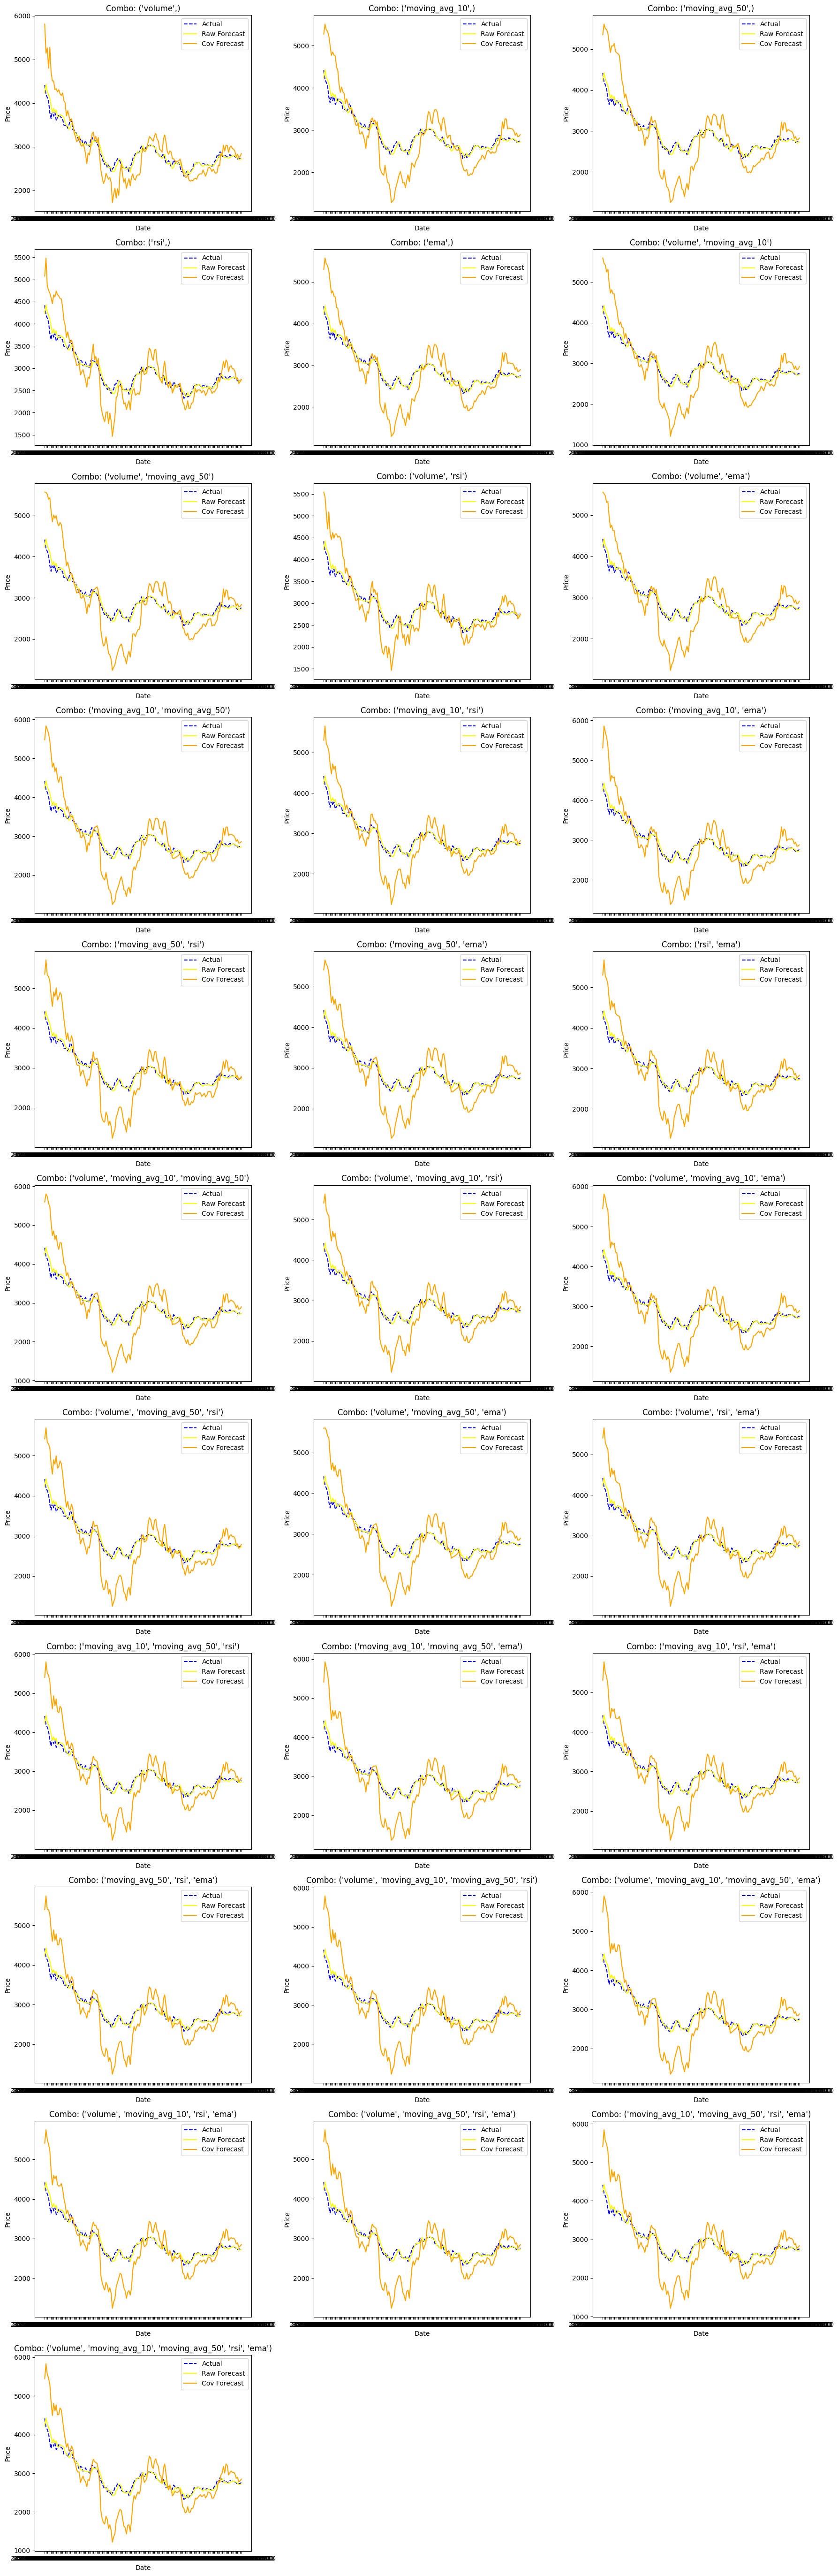

In [29]:
import math

# تعداد سطرها و ستون‌ها برای نمودارها
num_columns = 3
num_combos = len(feature_combinations)
num_rows = math.ceil(num_combos / num_columns)

# ایجاد نمودارهای چندگانه
fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 5 * num_rows))

# تبدیل axes به یک لیست مسطح برای دسترسی آسان
axes = axes.flatten()

for idx, combo in enumerate(feature_combinations):
    combo_results = results_df[results_df['combo'] == combo]

    axes[idx].plot(combo_results['predict_date'], combo_results['y_actual'], label='Actual', color='blue', linestyle='--')
    axes[idx].plot(combo_results['predict_date'], combo_results['raw_forecast'], label='Raw Forecast', color='yellow')
    axes[idx].plot(combo_results['predict_date'], combo_results['y_predict'], label='Cov Forecast', color='orange')

    axes[idx].set_title(f'Combo: {combo}')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Price')
    axes[idx].legend()

# حذف هر subplot خالی
for ax in axes[num_combos:]:
    fig.delaxes(ax)

# تنظیم فاصله بین نمودارها
plt.tight_layout()
plt.show()


In [30]:
 initial_investment = 10000000

In [31]:
import pandas as pd
from sklearn.metrics import mean_squared_error, accuracy_score

def calculate_mse(y_actual, y_forecast):
    return mean_squared_error(y_actual, y_forecast)

# Generalized accuracy function
def calculate_accuracy(y_actual, y_forecast):
    correct_predictions = 0
    total_predictions = 0

    for i in range(1, len(y_actual)):
        actual_today = y_actual.iloc[i]
        predicted_today = y_forecast.iloc[i]
        actual_yesterday = y_actual.iloc[i - 1]
        actual_movement = actual_today - actual_yesterday
        predicted_movement = predicted_today - actual_yesterday
        if actual_movement == 0:
            if predicted_movement != 0:
                total_predictions += 1

        if (actual_movement > 0 and predicted_movement > 0) or (actual_movement < 0 and predicted_movement < 0):
            correct_predictions += 1
        total_predictions += 1
    b=predicted_movement
    return correct_predictions / total_predictions if total_predictions > 0 else 0

# Generalized profit calculation function
def calculate_profit(y_actual, y_forecast):
    capital = initial_investment
    position = 0

    for i in range(1, len(y_actual)):
        today_price = y_actual.iloc[i]
        yesterday_price = y_actual.iloc[i - 1]
        predicted_today_price = y_forecast.iloc[i]

        if predicted_today_price > yesterday_price:
            if position == 0:
                position = capital / yesterday_price
                capital = 0
        elif predicted_today_price < yesterday_price:
            if position > 0:
                capital = position * yesterday_price
                position = 0

    if position > 0:
        capital = position * y_actual.iloc[-1]

    return capital - initial_investment

# Generalized actual direction accuracy function
def calculate_actual_direction_accuracy(y_actual, y_forecast):
    def get_direction(current_price, next_price):
        return 1 if next_price > current_price else 0

    real_directions = []
    predicted_directions = []

    for i in range(1, len(y_actual)):
        real_directions.append(get_direction(y_actual.iloc[i - 1], y_actual.iloc[i]))
        predicted_directions.append(get_direction(y_actual.iloc[i - 1], y_forecast.iloc[i]))


    return accuracy_score(real_directions, predicted_directions)

# Generalized direction accuracy function
def calculate_direction_accuracy(y_actual, y_forecast):
    correct_predictions = 0
    total_predictions = 0

    for i in range(1, len(y_actual)):
        actual_today = y_actual.iloc[i]
        predicted_today = y_forecast.iloc[i]
        actual_yesterday = y_actual.iloc[i - 1]
        predicted_yesterday = y_forecast.iloc[i - 1]
        actual_movement = actual_today - actual_yesterday
        predicted_movement = predicted_today - predicted_yesterday
        if actual_movement == 0:
            if predicted_movement != 0:
                total_predictions += 1

        if (actual_movement > 0 and predicted_movement > 0) or (actual_movement < 0 and predicted_movement < 0):
            correct_predictions += 1
        total_predictions += 1

    return correct_predictions / total_predictions if total_predictions > 0 else 0

# Generalized direction profit calculation function
def calculate_direction_profit(y_actual, y_forecast):
    capital = initial_investment
    position = 0

    for i in range(2, len(y_forecast)):
        yesterday_price = y_actual.iloc[i - 1]
        yesterday_predicted_today_price = y_forecast.iloc[i - 1]
        predicted_today_price = y_forecast.iloc[i]

        if predicted_today_price > yesterday_predicted_today_price:
            if position == 0:
                position = capital / yesterday_price
                capital = 0
        elif predicted_today_price < yesterday_predicted_today_price:
            if position > 0:
                capital = position * yesterday_price
                position = 0

    if position > 0:
        capital = position * y_actual.iloc[-1]

    return capital - initial_investment

def calculate_results_for_combo(combo, context_results_df_actual, context_results_df_predicted):
    # محاسبه مقادیر متریک‌ها
    mse_value = calculate_mse(context_results_df_actual, context_results_df_predicted)
    accuracy_value = calculate_accuracy(context_results_df_actual, context_results_df_predicted)
    profit = calculate_profit(context_results_df_actual, context_results_df_predicted)
    direction_accuracy = calculate_direction_accuracy(context_results_df_actual, context_results_df_predicted)
    actual_direction_accuracy = calculate_actual_direction_accuracy(context_results_df_actual, context_results_df_predicted)
    direction_profit = calculate_direction_profit(context_results_df_actual, context_results_df_predicted)

    # ساخت دیکشنری از نتایج محاسبه شده
    result = {
        'combo': combo,
        'mse': mse_value,
        'accuracy': accuracy_value,
        'direction_accuracy': direction_accuracy,
        'actual_direction_accuracy': actual_direction_accuracy,
        'direction_profit': direction_profit,
        'profit': profit
    }

    return pd.DataFrame([result])

# حالا نتایج را برای هر combo حساب می‌کنیم
final_results = []

for combo in results_df['combo'].unique():
    combo_data_actual = results_df[results_df['combo'] == combo]['y_actual']
    combo_data_predicted = results_df[results_df['combo'] == combo]['y_predict']

    combo_results_df = calculate_results_for_combo(combo, combo_data_actual, combo_data_predicted)
    final_results.append(combo_results_df)

# ترکیب تمام نتایج در یک DataFrame
final_results_df = pd.concat(final_results).reset_index(drop=True)

# نمایش نتایج نهایی

final_results_df

,combo,mse,accuracy,direction_accuracy,actual_direction_accuracy,direction_profit,profit
0,"(volume,)",151647.517485,0.487013,0.500000,0.487013,-1.944179e+06,-3.718259e+06
1,"(moving_avg_10,)",281672.340893,0.500000,0.500000,0.500000,-1.251954e+06,-2.717365e+06
2,"(moving_avg_50,)",383433.238782,0.474026,0.545455,0.474026,-5.196018e+05,-3.925844e+06
3,"(rsi,)",166571.201109,0.461039,0.545455,0.461039,-1.161582e+05,-3.756572e+06
4,"(ema,)",286961.157794,0.493506,0.532468,0.493506,-3.441184e+05,-2.960723e+06
5,"(volume, moving_avg_10)",284164.659157,0.487013,0.506494,0.487013,-1.430705e+06,-2.893022e+06
6,"(volume, moving_avg_50)",367316.483312,0.467532,0.506494,0.467532,-1.892509e+06,-3.937944e+06
7,"(volume, rsi)",174492.095038,0.435065,0.532468,0.435065,-1.444327e+06,-4.158335e+06
8,"(volume, ema)",289976.618698,0.487013,0.525974,0.487013,-1.300024e+06,-3.145143e+06
9,"(moving_avg_10, moving_avg_50)",344245.445852,0.467532,0.525974,0.467532,-8.344071e+05,-3.654604e+06


In [32]:

# پیدا کردن بهترین combo‌ها برای هر معیار
best_mse_combo = final_results_df.loc[final_results_df['mse'].idxmin()]
best_accuracy_combo = final_results_df.loc[final_results_df['accuracy'].idxmax()]
best_profit_combo = final_results_df.loc[final_results_df['profit'].idxmax()]
best_direction_accuracy_combo = final_results_df.loc[final_results_df['direction_accuracy'].idxmax()]
best_actual_direction_accuracy_combo = final_results_df.loc[final_results_df['actual_direction_accuracy'].idxmax()]
best_direction_profit_combo = final_results_df.loc[final_results_df['direction_profit'].idxmax()]

# نمایش بهترین ترکیب‌ها برای هر معیار
print("Best Combinations by Metric:")
print(f"Best MSE Combo: {best_mse_combo['combo']} with MSE: {best_mse_combo['mse']}")
print(f"Best Accuracy Combo: {best_accuracy_combo['combo']} with Accuracy: {best_accuracy_combo['accuracy']}")
print(f"Best Profit Combo: {best_profit_combo['combo']} with Profit: {best_profit_combo['profit']}")
print(f"Best Direction Accuracy Combo: {best_direction_accuracy_combo['combo']} with Direction Accuracy: {best_direction_accuracy_combo['direction_accuracy']}")
print(f"Best Actual Direction Accuracy Combo: {best_actual_direction_accuracy_combo['combo']} with Actual Direction Accuracy: {best_actual_direction_accuracy_combo['actual_direction_accuracy']}")
print(f"Best Direction Profit Combo: {best_direction_profit_combo['combo']} with Direction Profit: {best_direction_profit_combo['direction_profit']}")

Best Combinations by Metric:
Best MSE Combo: ('volume',) with MSE: 151647.51748524435
Best Accuracy Combo: ('moving_avg_10',) with Accuracy: 0.5
Best Profit Combo: ('moving_avg_10',) with Profit: -2717365.377410249
Best Direction Accuracy Combo: ('moving_avg_10', 'moving_avg_50', 'rsi', 'ema') with Direction Accuracy: 0.5714285714285714
Best Actual Direction Accuracy Combo: ('moving_avg_10',) with Actual Direction Accuracy: 0.5
Best Direction Profit Combo: ('moving_avg_10', 'moving_avg_50', 'rsi', 'ema') with Direction Profit: 1185386.8775096554


In [33]:
# محاسبه‌ی متریک‌ها برای پیش‌بینی خام (Raw Forecast)
results_df=results_df[results_df['combo'] == combo]
y_actual = results_df['y_actual'].values
raw_forecast = results_df['raw_forecast'].values


# محاسبه متریک‌ها با استفاده از توابع از پیش تعریف شده
mse_value = calculate_mse(pd.Series(y_actual), pd.Series(raw_forecast))
accuracy_value = calculate_accuracy(pd.Series(y_actual), pd.Series(raw_forecast))
profit_value = calculate_profit(pd.Series(y_actual), pd.Series(raw_forecast))
direction_accuracy_value = calculate_direction_accuracy(pd.Series(y_actual), pd.Series(raw_forecast))
actual_direction_accuracy_value = calculate_actual_direction_accuracy(pd.Series(y_actual), pd.Series(raw_forecast))
direction_profit_value = calculate_direction_profit(pd.Series(y_actual), pd.Series(raw_forecast))

# نمایش نتایج محاسباتی
print(f"MSE: {mse_value}")
print(f"Accuracy: {accuracy_value}")
print(f"Profit: {profit_value}")
print(f"Direction Accuracy: {direction_accuracy_value}")
print(f"Actual Direction Accuracy: {actual_direction_accuracy_value}")
print(f"Direction Profit: {direction_profit_value}")


MSE: 6865.041666737295
Accuracy: 0.5194805194805194
Profit: -2014116.8538599322
Direction Accuracy: 0.538961038961039
Actual Direction Accuracy: 0.5454545454545454
Direction Profit: 803814.0795162395


In [34]:

    initial_price = results_df['y_actual'].iloc[0]
    final_price = results_df['y_actual'].iloc[-1]

    # Calculate the number of shares bought initially
    shares_bought = initial_investment / initial_price

    # Calculate the final value of the investment
    final_investment_value = shares_bought * final_price

    # Calculate the total profit
    buy_and_hold_profit = final_investment_value - initial_investment
    buy_and_hold_profit

-3753678.9676250853